In [1]:
import matplotlib
import os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# load stage 3
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_2/',
              model_directory+'/irv/stage_2/',
              model_directory+'/neural_networks/stage_2/',
              model_directory+'/docking/stage_2/',
              model_directory+'/baseline/stage_2/']
gather_df_3 = gather_dir_metrics(class_dirs[0], 1)     
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[1], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[2], 1))   
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[3], 1))
gather_df_3 = gather_df_3.append(gather_dir_metrics(class_dirs[4], 1))

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df_3.columns[i] and 'Median' not in gather_df_3.columns[i]]
col_indices = [i for i in col_indices if 'PriA-SSB AS' in gather_df_3.columns[i]]
metric_names = list(gather_df_3.columns.values[col_indices])

gather_df_3 = gather_df_3[metric_names]
gather_df_3 = gather_df_3.dropna(axis=0)

#setup comparison matrix and overlaps
mm_comp_dicts_3 = get_mean_median_comps(gather_df_3, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_3 = get_agg_comp(mm_comp_dicts_3, None, mean_w=1, median_w=0, tukey_w=0)
overlapping_models_3 = get_overlap(agg_comp_dict_3, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)
C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 112 results
  r = func(a, **kwargs)


In [2]:
# load stage 2
model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5
gather_df_2 = gather_dir_metrics(class_dirs[0], k)     
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[1], k))   
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[2], 20))
gather_df_2 = gather_df_2.append(gather_dir_metrics(class_dirs[3], k))
gather_df_2 = gather_df_2[metric_names]
gather_df_2 = gather_df_2.dropna(axis=0)

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df_2, col_indices=[i for i in range(len(metric_names))])
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts_2 = get_mean_median_comps(gather_df_2, col_indices=[i for i in range(len(metric_names))])
agg_comp_dict_2 = get_agg_comp(mm_comp_dicts_2, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models_2 = get_overlap(agg_comp_dict_2, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)


---
## Compare Model Orderings

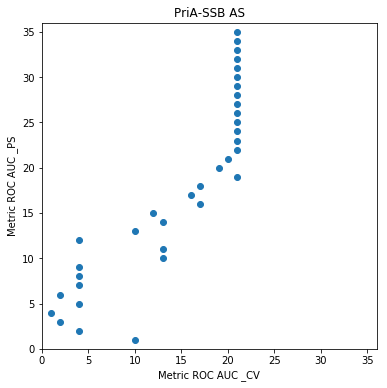

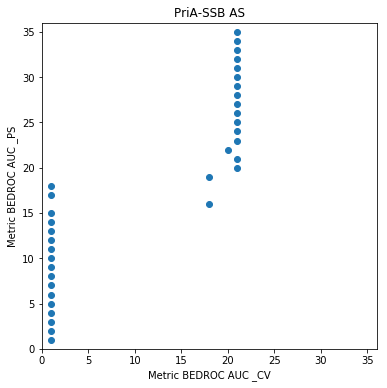

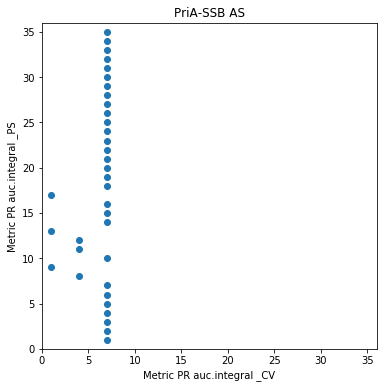

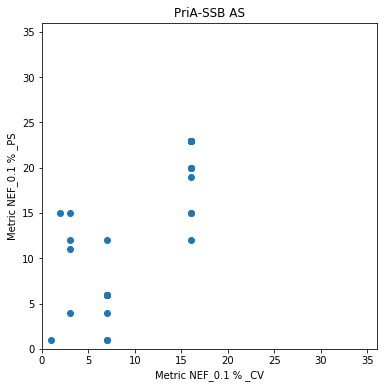

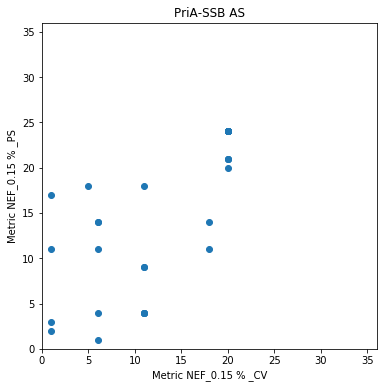

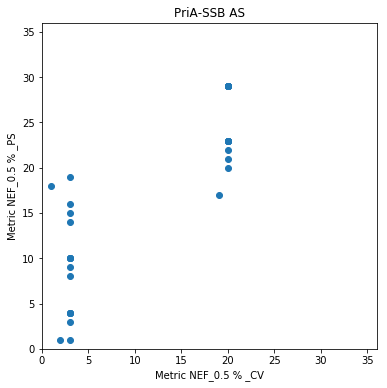

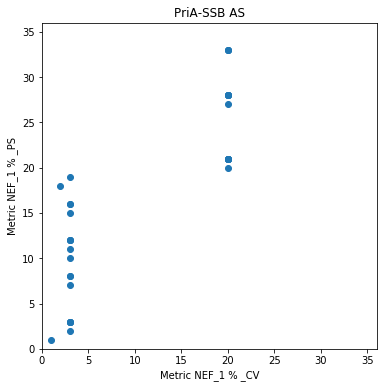

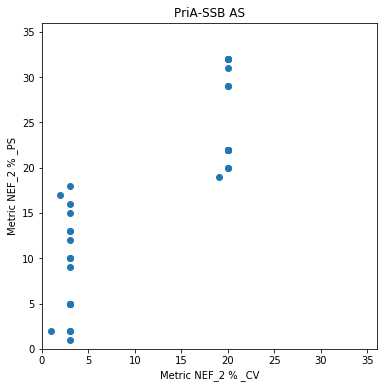

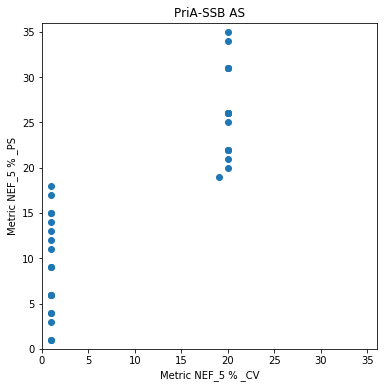

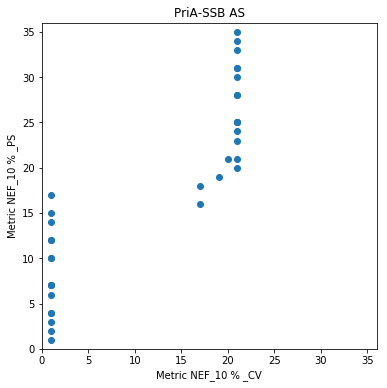

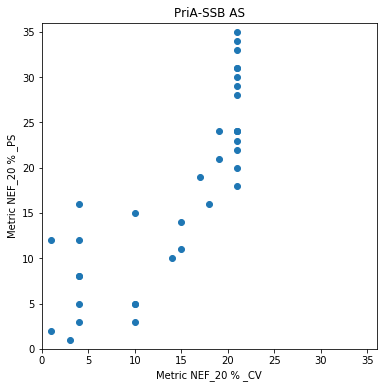

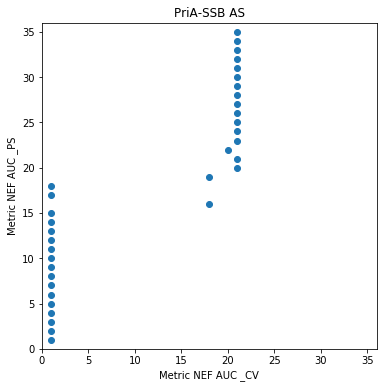

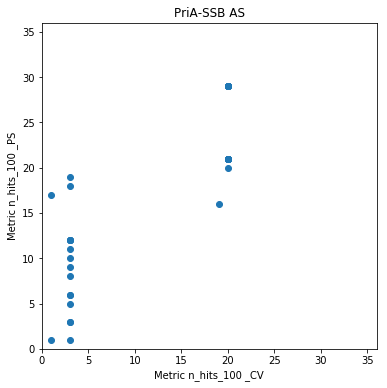

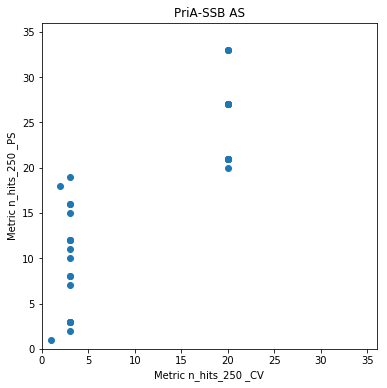

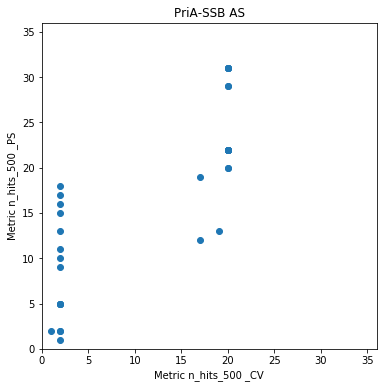

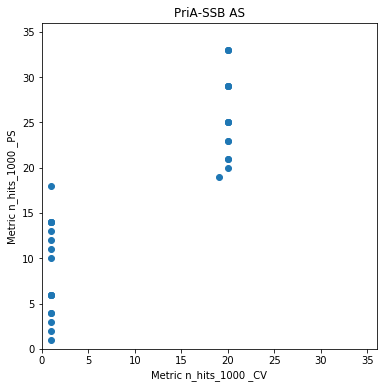

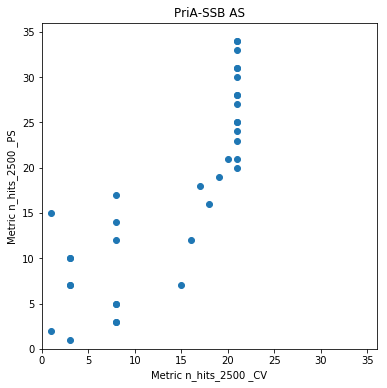

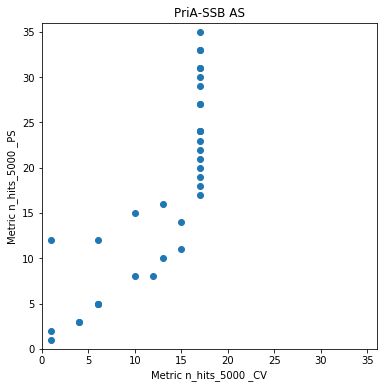

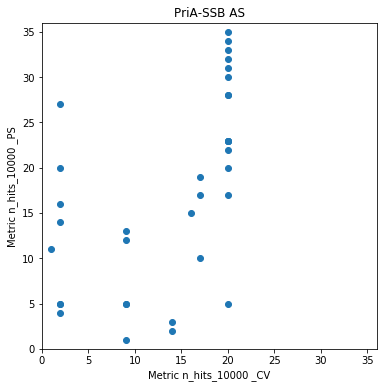

In [3]:
winscore_df_2 = get_model_winscores(agg_comp_dict_2, metric_names)
winscore_df_3 = get_model_winscores(agg_comp_dict_3, metric_names)
winscore_spearman_df = compare_cv_ps_model_ranking(winscore_df_2, winscore_df_3)
if not os.path.exists('./cv_ps_figures/cv_ps_model_ordering_comparison/'):
    os.makedirs('./cv_ps_figures/cv_ps_model_ordering_comparison/')
plot_comparison_cv_ps(winscore_df_2, winscore_df_3, './cv_ps_figures/cv_ps_model_ordering_comparison/')

In [4]:
winscore_spearman_df

,ROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB AS,PR auc.integral PriA-SSB AS,NEF_0.1 % PriA-SSB AS,NEF_0.15 % PriA-SSB AS,NEF_0.5 % PriA-SSB AS,NEF_1 % PriA-SSB AS,NEF_2 % PriA-SSB AS,NEF_5 % PriA-SSB AS,NEF_10 % PriA-SSB AS,NEF_20 % PriA-SSB AS,NEF AUC PriA-SSB AS,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.9233,0.8875,0.2789,0.7928,0.8161,0.8522,0.8482,0.8592,0.8792,0.9034,0.8717,0.8875,0.8575,0.8491,0.8824,0.8799,0.874,0.883,0.6551


---
## Overlapping top 1 and top 5 models over all metrics

In [5]:
overlapping_models_2 

,overlap_perc
RandomForest_h,0.5789
SingleClassification_a,0.4737
SingleRegression_b,0.4211
SingleClassification_b,0.4211
MultiClassification_b,0.4211
IRV_e,0.3684
SingleRegression_a,0.3158
RandomForest_d,0.3158
MultiClassification_a,0.3158
RandomForest_g,0.2632


In [6]:
overlapping_models_3

,overlap_perc
SingleRegression_a,0.5263
RandomForest_h,0.3158
RandomForest_g,0.2105
SingleRegression_b,0.1579
SingleClassification_b,0.0526


In [7]:
get_overlap(agg_comp_dict_2, N=5)

,overlap_perc
MultiClassification_b,0.8947
SingleRegression_b,0.8421
SingleClassification_a,0.7895
RandomForest_c,0.7895
RandomForest_a,0.7368
RandomForest_h,0.7368
SingleRegression_a,0.7368
IRV_e,0.7368
RandomForest_d,0.7368
SingleClassification_b,0.7368


In [8]:
get_overlap(agg_comp_dict_3, N=5)

,overlap_perc
RandomForest_g,0.9474
RandomForest_h,0.8947
RandomForest_e,0.6316
SingleRegression_a,0.6316
SingleRegression_b,0.6316
RandomForest_d,0.5789
RandomForest_c,0.5263
RandomForest_a,0.3684
RandomForest_b,0.3158
IRV_e,0.1053


---
## Spearman's Ranking Comparison

In [9]:
spearman_df_2, ordered_spearman_df_2 = get_spearman_r(agg_comp_dict_2, metric_names[:-7], metric_names[-7:])
spearman_df_3, ordered_spearman_df_3 = get_spearman_r(agg_comp_dict_3, metric_names[:-7], metric_names[-7:])
diff_df, ordered_diff_df, spearman_df = compare_spearman_r(spearman_df_2, spearman_df_3)
diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
ROC AUC,0.0349,0.0057,0.0081,0.0079,0.0412,0.0656,0.1912
BEDROC AUC,0.0304,0.0179,0.0065,0.0249,0.0524,0.1227,0.1525
PR auc.integral,0.4740,0.4986,0.4815,0.4718,0.5169,0.4952,0.6235
NEF_0.1 %,0.1533,0.1047,0.1003,0.0044,0.1740,0.2622,0.2114
NEF_0.15 %,0.0132,0.0403,0.0505,0.1029,0.1066,0.1923,0.0018
NEF_0.5 %,0.0170,0.0226,0.0513,0.0729,0.0183,0.0704,0.0246
NEF_1 %,0.0220,0.0010,0.0195,0.0662,0.0291,0.1118,0.0591
NEF_2 %,0.0578,0.0489,0.0342,0.0167,0.0521,0.1120,0.1304
NEF_5 %,0.0768,0.0631,0.0078,0.0109,0.0420,0.0795,0.0830
NEF_10 %,0.0300,0.0209,0.0020,0.0164,0.0462,0.0724,0.1691


In [10]:
ordered_diff_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
0,NEF_0.15 %,NEF_20 %,NEF_20 %,NEF_20 %,NEF_20 %,ROC AUC,NEF_0.15 %
1,NEF_0.5 %,NEF_1 %,NEF_10 %,NEF_0.1 %,NEF_0.5 %,NEF_0.5 %,NEF_0.5 %
2,NEF_1 %,ROC AUC,BEDROC AUC,ROC AUC,NEF_1 %,NEF_10 %,NEF_1 %
3,NEF AUC,NEF AUC,NEF AUC,NEF_5 %,ROC AUC,NEF_20 %,NEF_5 %
4,NEF_20 %,BEDROC AUC,NEF_5 %,NEF_10 %,NEF_5 %,NEF_5 %,NEF_2 %
5,NEF_10 %,NEF_10 %,ROC AUC,NEF_2 %,NEF_10 %,NEF_1 %,NEF AUC
6,BEDROC AUC,NEF_0.5 %,NEF_1 %,NEF AUC,NEF AUC,NEF_2 %,BEDROC AUC
7,ROC AUC,NEF_0.15 %,NEF_2 %,BEDROC AUC,NEF_2 %,NEF AUC,NEF_10 %
8,NEF_2 %,NEF_2 %,NEF_0.15 %,NEF_1 %,BEDROC AUC,BEDROC AUC,ROC AUC
9,NEF_5 %,NEF_5 %,NEF_0.5 %,NEF_0.5 %,NEF_0.15 %,NEF_0.15 %,NEF_0.1 %


In [11]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_250 PriA-SSB AS,n_hits_500 PriA-SSB AS,n_hits_1000 PriA-SSB AS,n_hits_2500 PriA-SSB AS,n_hits_5000 PriA-SSB AS,n_hits_10000 PriA-SSB AS
CV vs. PS,0.4939,0.662,0.6211,0.8441,0.8231,0.8056,-0.1576


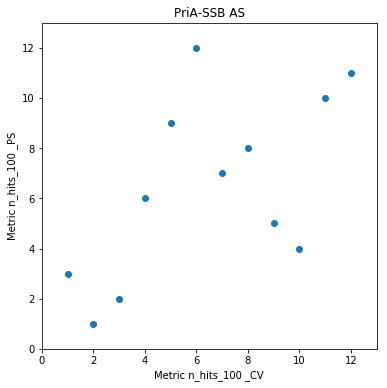

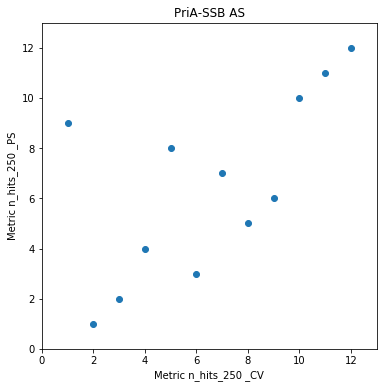

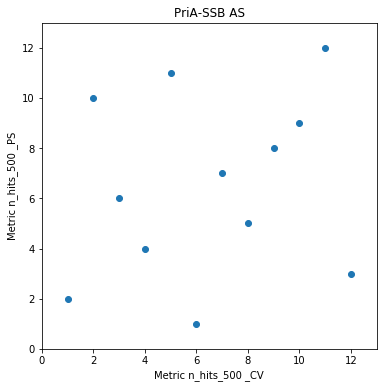

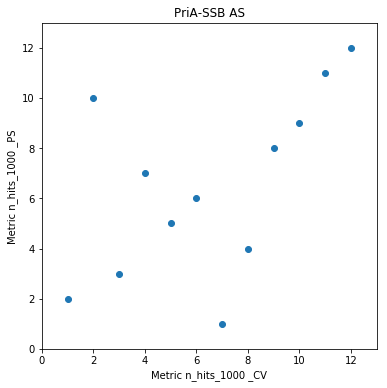

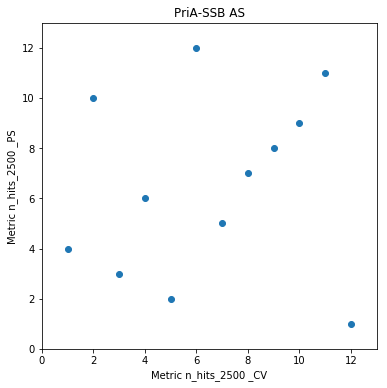

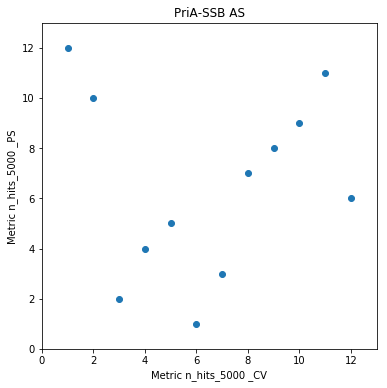

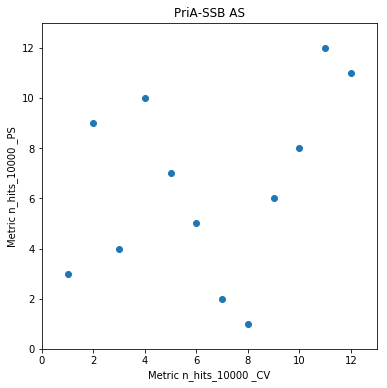

In [12]:
if not os.path.exists('./cv_ps_figures/cs_ps_scatter_plot_comparison/'):
    os.makedirs('./cv_ps_figures/cs_ps_scatter_plot_comparison/')
plot_comparison_cv_ps(ordered_spearman_df_2, ordered_spearman_df_3, './cv_ps_figures/cs_ps_scatter_plot_comparison/')